In [1]:
import logging
from typing import List, Callable, Optional, Any

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.decomposition import PCA


from pynamics import downsample, downsample_split, avg_over, get_attractor_dimension
from pynamics.utils import np_cache, eigsort

from randnn import ContinuousNN, scaling_analysis
from hoogland_masters.plotting import *


rc('text', usetex=True)
logging.basicConfig(level=logging.INFO)

# Generating random continuous-rate neural networks

First, we want to make sure that we're correctly creating our random neural networks. 

### Parameters
Change the following parameters to play with generated neural networks.

In [2]:
# Main parameters:
COUPLING_STRENGTH = 10
N_NEURONS = 500

# The remaining parameters influence temporal resolution and trajectory duration
TIMESTEP = 0.1
N_STEPS = 1000000
N_BURNIN_STEPS = 500

In [3]:
# Create a network
cont_nn = ContinuousNN(coupling_strength=COUPLING_STRENGTH, n_dofs=N_NEURONS, timestep=TIMESTEP)

# Generate a neural trajectory on this network
trajectory = cont_nn.run(n_steps=N_STEPS, n_burn_in=N_BURNIN_STEPS)

print(trajectory.shape)
downsampled_trajectory = trajectory[::100, :]
print(downsampled_trajectory.shape)
# Calculate the lyapunov spectrum of this network
lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(downsampled_trajectory, t_ons=100)


# Given the lyapunov spectrum, calculate the attractor dimension
print("Attractor dimension: {}".format(get_attractor_dimension(lyapunov_spectrum)))

INFO:root:Loading from save ./saves/trajectories/trajectory-7730999415de71f7994b8804ffbbd788.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-90ed18647d092de5ffb88611da8d74a8.npy


(1000000, 500)
(10000, 500)
Attractor dimension: 1.0


/Users/Jesse/Projects/masters-thesis/code/hoogland-masters/hoogland_masters/plotting/__init__.py:113: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


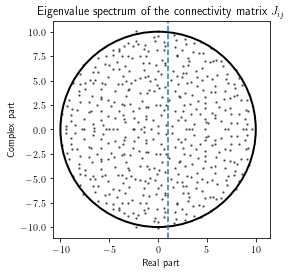

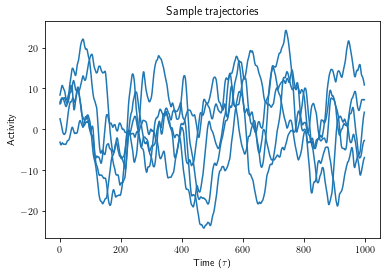

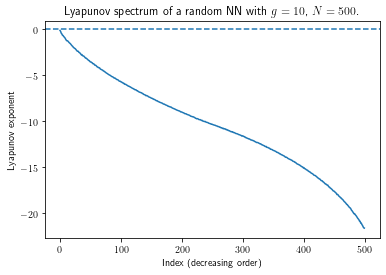

In [4]:
##### Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(cont_nn.coupling_matrix, COUPLING_STRENGTH)
plt.show()

# Plot a few sample trajectories to get visual insight to the (non-)chaotic dynamics
plot_trajectory_samples(trajectory[:1000], 5)
plt.show()

# Plot the full lyapunov spectrum (following Engelken et al. 2020)
plot_lyapunov_spectrum(lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))
plt.show()

INFO:root:Loading from save ./saves/trajectories/trajectory-798624dee4bee4162b0c39107b3f583a.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-560dcc4efc0edec6a7cefa2d02a4211f.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-e271b9d31b975655f77e45cd7f076efe.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-77e6b4486703ea1576bcec780bd2b35f.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-148e2dbe4f626586855a75d7e72efed6.npy
Generating samples: 100%|██████████| 50000/50000 [00:18<00:00, 2714.31it/s]
INFO:root:Saving to ./saves/trajectories/trajectory-217ef1b479b37a16f956a58a2fd37102.npy
Generating samples: 100%|██████████| 50000/50000 [00:19<00:00, 2611.37it/s]
INFO:root:Saving to ./saves/trajectories/trajectory-4195898a2828840e545d988ebe3a8584.npy


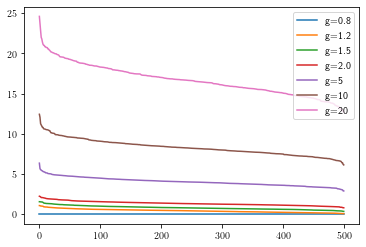

In [10]:
GS = [0.8, 1.2, 1.5, 2.0, 5, 10, 20]

def trajectory_std(trajectory, *args, **kwargs): 
    return np.sort(np.std(trajectory, axis=0))[::-1]

# Just to make sure ``plot_curves_with_g`` works
plot_curves_with_g(GS, trajectory_std, n_dofs=500, n_steps=50000)


INFO:root:Loading from save ./saves/trajectories/trajectory-798624dee4bee4162b0c39107b3f583a.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-f9e4bbbccef269531f08329a162e1d79.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-560dcc4efc0edec6a7cefa2d02a4211f.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-bfedff1c2d567ce36f857cdb7b20c6eb.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-e271b9d31b975655f77e45cd7f076efe.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-6f1acc9476f64302b4d2fcba371c9598.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-77e6b4486703ea1576bcec780bd2b35f.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-2638ec910a2117350e1865d60aad1593.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-148e2dbe4f626586855a75d7e72efed6.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-110987f1bb35e039283a83e2a348de8c.npy
INFO:root:Loading from save ./saves/trajectories/trajectory-

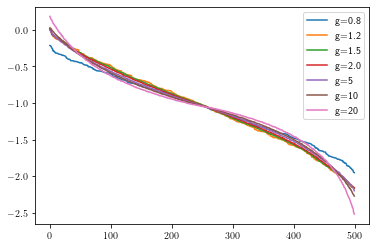

In [11]:
def get_lyapunov_spectrum(trajectory, system):
    return system.get_lyapunov_spectrum(trajectory[::10])

plot_curves_with_g(GS, get_lyapunov_spectrum, n_dofs=500, n_steps=50000)
